In [1]:
from scipy.io import wavfile as wav
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from tqdm import tqdm
import librosa
import os
import glob
import librosa.display

/home/manoel/anaconda3/envs/urbansound/lib/python3.9/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


96000
[[-536709632 -536709632]
 [-515746816 -515746816]
 [-483104768 -483104768]
 ...
 [ 103576576  103576576]
 [  89840896   89840896]
 [  79413504   79413504]]


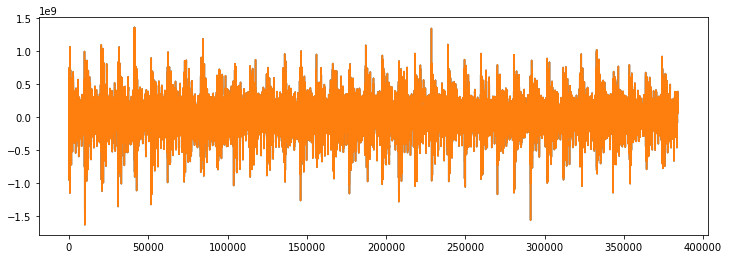

In [2]:
filepath = 'UrbanSound8k/UrbanSound8K/audio/fold1/180937-7-0-1.wav'
wave_sample_rate, wave_audio = wav.read(filepath)
print(wave_sample_rate)
print(wave_audio)
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)
del wave_sample_rate, wave_audio

In [3]:
metadata = pd.read_csv('UrbanSound8k/UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [4]:
metadata['class'].value_counts()

dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

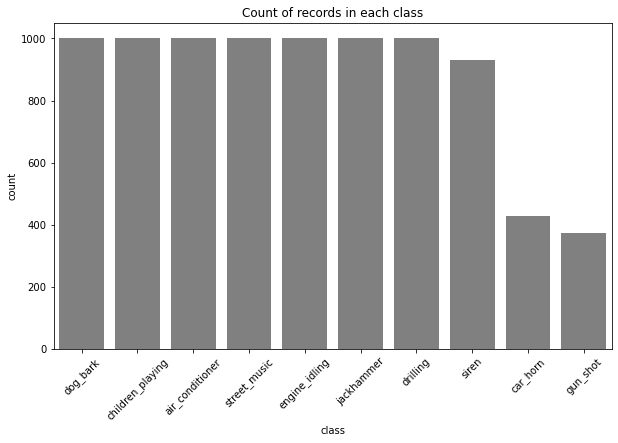

In [5]:
plt.figure(figsize=(10, 6))
sns.countplot(metadata, x='class', color='gray', order=metadata['class'].value_counts().index)
plt.title("Count of records in each class")
plt.xticks(rotation=45)
plt.show()

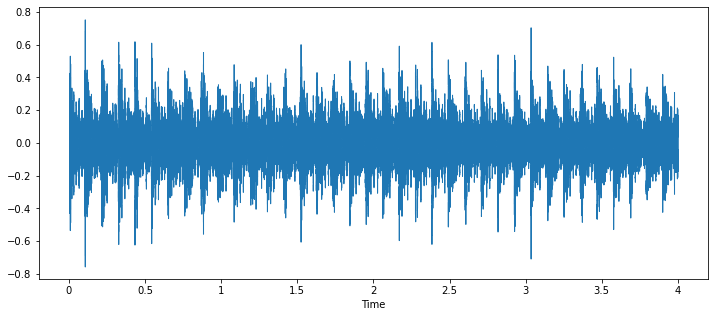

In [9]:
data, sample_rate = librosa.load(filepath)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(data, sr=sample_rate)
# del data, sample_rate

In [10]:
mfccs = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=40)
print(mfccs.shape)
print(mfccs)

(40, 173)
[[ -50.878727    -51.036507    -99.568306   ...  -97.44729
  -118.11546    -143.25616   ]
 [ 103.13124     109.20503     118.001366   ...  111.44255
   118.78938     126.531136  ]
 [ -34.384636    -24.618889     -4.300396   ...   -2.6329708
    -3.5648127     1.5735939 ]
 ...
 [  -5.6932335    -4.744195     -2.313857   ...   -3.106772
    -3.2834668    -1.4834627 ]
 [  -3.9443855    -6.6464396    -3.509061   ...   -4.395317
    -2.32577      -4.5865107 ]
 [  -2.8965397     0.19145608    4.946424   ...   -9.157978
    -0.35080433   -4.1737633 ]]


In [8]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    return mfccs_scaled_features

In [9]:
BASE_PATH = 'UrbanSound8k/UrbanSound8K/audio/'

In [20]:
X, y = [], []

for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(BASE_PATH,'fold'+str(row["fold"]),str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    X.append(data)
    y.append(final_class_labels)

8732it [08:33, 17.01it/s]


In [21]:
X = np.array(X)
y = np.array(y)

print(X.shape)
print(y.shape)

(8732, 40)
(8732,)


In [22]:
np.save('X.npy', X)
np.save('y.npy', y)

In [24]:
for i in range(5):
    print(X[i, :3], y[i])

[-217.35526   70.22338 -130.38527] dog_bark
[-424.09818   109.34077   -52.919525] children_playing
[-458.79114   121.38419   -46.520657] children_playing
[-413.89984  101.66371  -35.42945] children_playing
[-446.60352   113.68541   -52.402214] children_playing
